In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"]=[15,5]

In [4]:
raw=pd.read_csv('loader.csv', usecols=['timestamp', 'data.ax', 'data.ay', 'data.az', 'data.A1'])

In [5]:
raw["acc"] = ( raw["data.ax"]**2 + raw["data.az"]**2 ) ** 0.5

In [6]:
mins = 100
window = mins * 60 * 75

In [7]:
acc=raw[["timestamp", "acc"]]
acc.set_index('timestamp')
acc.head()

,timestamp,acc
0,2018-03-13T18:29:59.828691,0.058550
1,2018-03-13T18:29:59.829822,0.058662
2,2018-03-13T18:29:59.830879,0.055355
3,2018-03-13T18:29:59.831915,0.055459
4,2018-03-13T18:29:59.832950,0.057423


In [8]:
# acc.head(window).to_csv('loader_head.csv', index=False)

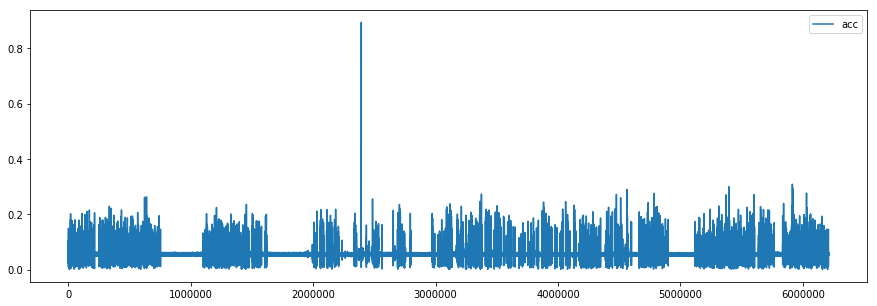

In [9]:
test=acc
# test=pd.read_csv('loader_head.csv')
test.plot()
# test['timestamp']=acc.head(window)['timestamp']

In [10]:
# acc=pd.read_csv('loader_head.csv')
test1=test
test1['acc']=pd.Series.to_frame(test.acc.rolling(75, center=True).std())
test1.to_csv('rollingstd.csv', index=False)

/home/raghu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


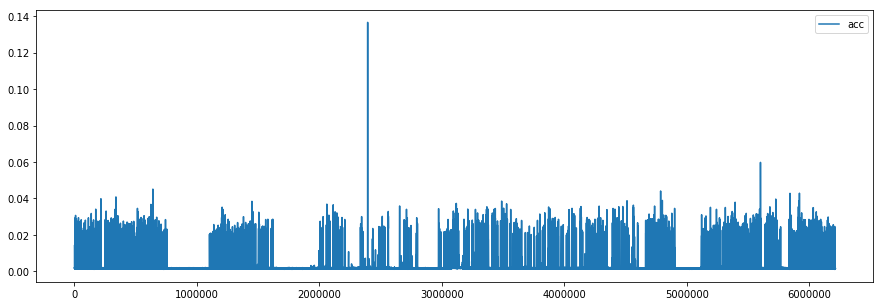

In [11]:
test=pd.read_csv('rollingstd.csv')
test.plot()

In [12]:
import scipy.signal
import numpy as np

In [13]:
# refill=scipy.signal.find_peaks(test.acc, height=(0.0050, 0.020), width=100)

In [14]:
# brd=scipy.signal.find_peaks(test.acc,height=(0.015), width=75)

board=scipy.signal.find_peaks(test.acc,height=(0.015), width=75)

In [15]:
# refill
board

(array([   2803,    8773,   14711,   19511,   19739,   19952,   20142,
          21113,   21701,   22152,   23241,   26786,   32520,   38553,
          48941,   54956,   61045,   67174,   73269,   79365,   88881,
          94964,  101030,  107473,  113606,  119622,  125634,  127567,
         131109,  136978,  143007,  149361,  155515,  161485,  167434,
         173406,  179481,  185404,  191336,  197379,  203698,  209702,
         215744,  251219,  255136,  258136,  260009,  263002,  267589,
         273708,  279816,  286561,  295704,  300089,  304515,  310408,
         316326,  316744,  317258,  317485,  317852,  318112,  318315,
         318635,  329695,  330510,  330670,  336434,  337608,  338002,
         338360,  338731,  338869,  339295,  339788,  339891,  340349,
         340790,  345682,  351592,  357360,  363311,  369098,  375068,
         381102,  387211,  393293,  399211,  405093,  411207,  417345,
         423487,  429506,  435584,  441713,  448250,  454338,  460445,
      

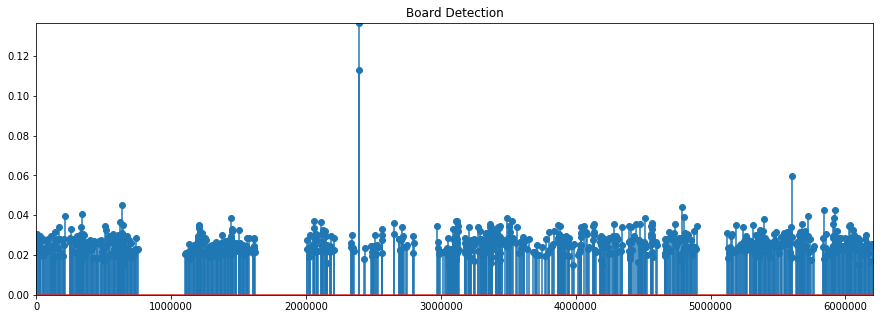

In [16]:
plt.stem(board[0], board[1]['peak_heights'])
# plt.stem(refill[0],0.04*refill[1]['prominences']/refill[1]['peak_heights'])
plt.title('Board Detection')
# plt.ylim(ymax = 0.04, ymin = 0)
plt.margins(0)
# plt.xlim(xmax = 500000, xmin = 0)

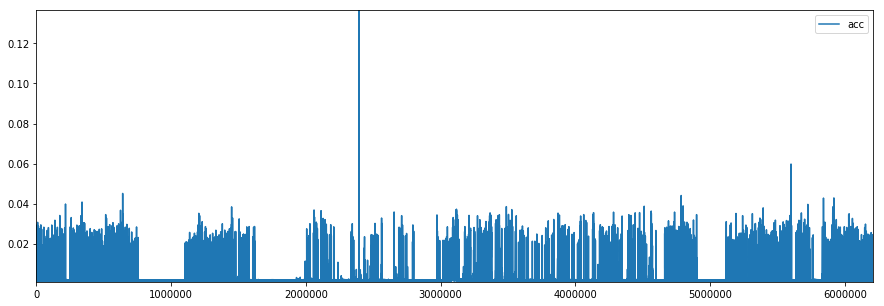

In [17]:
test.plot()
plt.margins(0)

In [18]:
# plt.stem(refill[0], refill[1]['peak_heights'])
# plt.ylim(ymax = 0.04, ymin = 0)
# plt.title("Refill Detection")
# plt.xlim(xmax = 500000, xmin = 0)
# plt.stem(np.fft.fft(refill[1]['peak_heights']))

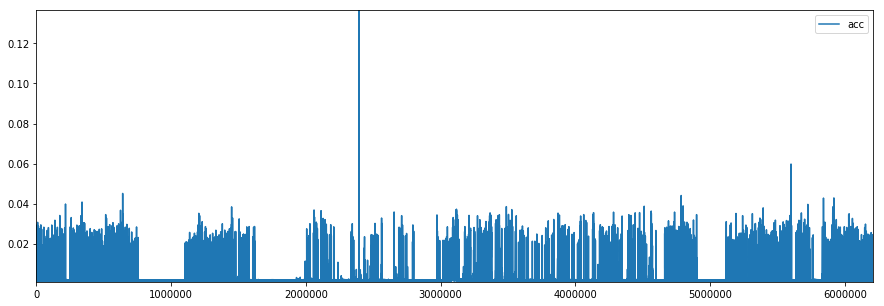

In [19]:
test.plot()
plt.margins(0)
# plt.ylim(ymax = 0.04, ymin = 0)
# plt.xlim(xmax = 500000, xmin = 0)

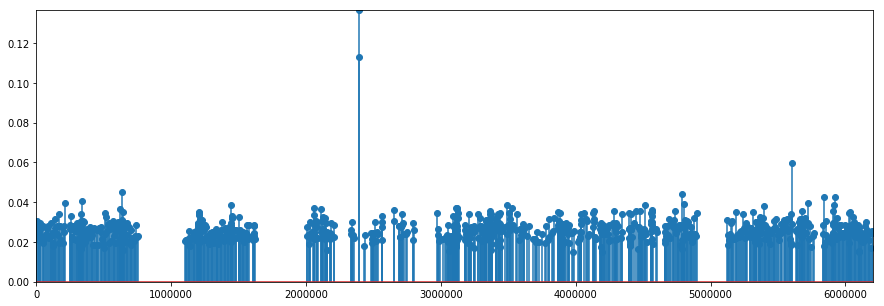

In [20]:
plt.stem(board[0], board[1]['peak_heights'])
plt.margins(0)

In [21]:
# start=board[0][0]
# end=board[0][-1]
# block_size=75*60*1
# board[1]['refill_status']=[0]*len(refill[0])

In [22]:
boards=[]
differ=np.diff(board[0])
differ=differ.tolist()
# differ

1908.9


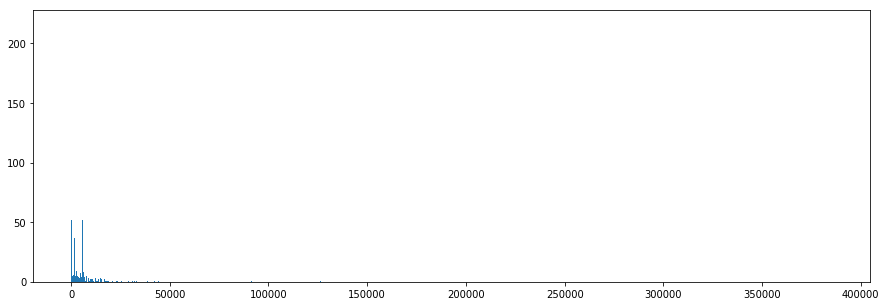

In [23]:
binwidth=200
plt.hist(differ, bins=np.arange(min(differ), max(differ) + binwidth, binwidth))
print(np.percentile(differ, 30))

In [24]:
test.insert(2,'state',0)
boards=[]
boards.append(board[0][0])
for i, x in enumerate(board[0]):
    try:
        if differ[i]>5000:
             #print(x)
            boards.append(board[0][i+1])
            test.at[x, 'state']=1
        else:
            test.at[x, 'state']=2
    except:
        continue

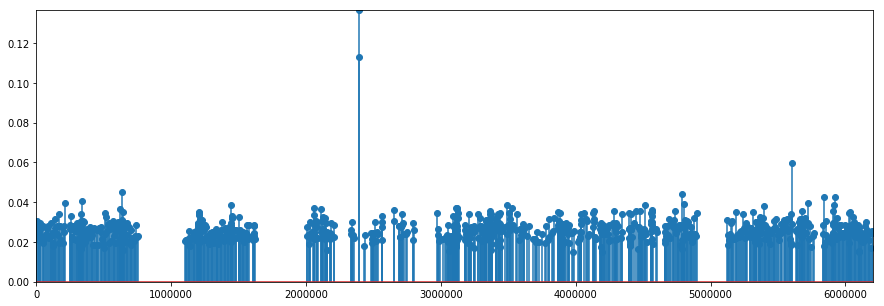

In [25]:
plt.stem(board[0], board[1]['peak_heights'])
plt.margins(0)

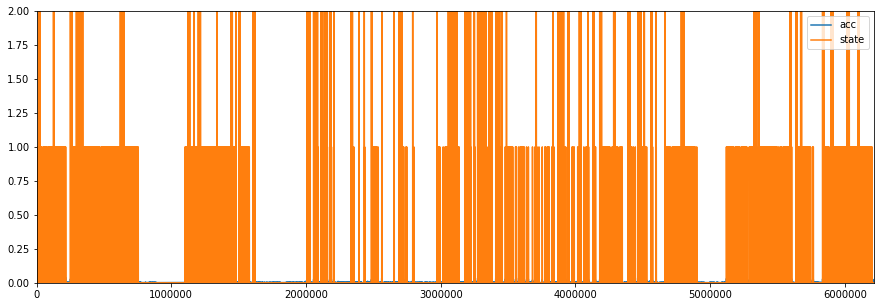

In [26]:
test.plot()
plt.margins(0)

In [27]:
# plt.stem(boards, np.ones(len(boards))*0.04, 'orange', '--',)
# plt.margins(0)

In [28]:
# plt.stem(boards, np.ones(len(boards)))
# plt.margins(0)

In [29]:
len(boards)

504

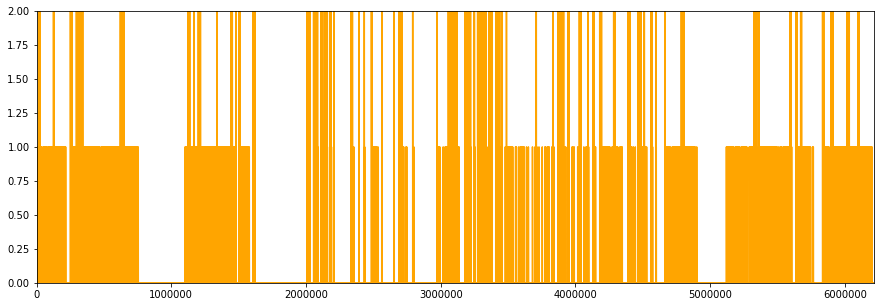

In [30]:
test['state'].plot(color='orange')
plt.margins(0)

In [31]:
test.drop('acc', axis=1, inplace=True)

In [32]:
test

,timestamp,state
0,2018-03-13T18:29:59.828691,0
1,2018-03-13T18:29:59.829822,0
2,2018-03-13T18:29:59.830879,0
3,2018-03-13T18:29:59.831915,0
4,2018-03-13T18:29:59.832950,0
5,2018-03-13T18:29:59.850131,0
6,2018-03-13T18:29:59.851286,0
7,2018-03-13T18:29:59.852322,0
8,2018-03-13T18:29:59.853362,0
9,2018-03-13T18:29:59.866181,0
